<a href="https://colab.research.google.com/github/lmichsr/paper_rock_scissors_machinelearning/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. DATA PREPARATION - DOWNLOAD DATASET
Dataset Paper, Rock dan Scissors diunduh dari TensorFlow datasets dengan menggunakan perintah berikut:

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2025-10-08 04:11:19--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 173.194.212.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   104MB/s    in 1.8s    

2025-10-08 04:11:21 (104 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2025-10-08 04:11:21--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 173.194.212.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/rps-t

# 2. EKSTRASI DATASET
Setelah dataset berhasil diunduh, langkah selanjutnya adalah mengekstak ZIP agar data dapat diakses oleh model.

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# 3. INITIAL CHECKING AND EXPLORATION OF THE DATASET
Lakukan pengecekan isi dataset untuk memastikan bahwa file gambar telah berhasil di ekstraksi dan siap digunakan untuk pelatihan model. Kode ini juga dapat menghitung jumlah gambar yang ada di masing-masing folder.

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print("Total Training Rock Images: ", len(os.listdir(rock_dir)))
print("Total Training Paper Images: ", len(os.listdir(paper_dir)))
print("Total Training Scissors Images: ", len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

Total Training Rock Images:  840
Total Training Paper Images:  840
Total Training Scissors Images:  840
['rock06ck02-032.png', 'rock07-k03-039.png', 'rock06ck02-061.png', 'rock05ck01-083.png', 'rock06ck02-077.png', 'rock04-101.png', 'rock02-019.png', 'rock05ck01-028.png', 'rock05ck01-018.png', 'rock02-040.png']
['paper01-115.png', 'paper03-111.png', 'paper03-075.png', 'paper04-071.png', 'paper05-032.png', 'paper07-060.png', 'paper02-038.png', 'paper01-076.png', 'paper05-106.png', 'paper03-025.png']
['testscissors01-104.png', 'testscissors03-041.png', 'testscissors01-099.png', 'testscissors03-009.png', 'testscissors01-095.png', 'scissors02-016.png', 'scissors02-003.png', 'testscissors02-059.png', 'testscissors03-038.png', 'scissors03-024.png']


# 4. VISUALIZATION OF EXAMPLE DATASET
Selanjutnya adalah visualisasi beberapa contoh gambar dari setiap kategori. Gunanya visualisasi adalah untuk membantu memastikan bahwa data dapat dibaca dengan benar sebelum dimasukkan ke dalam mode pelatihan.

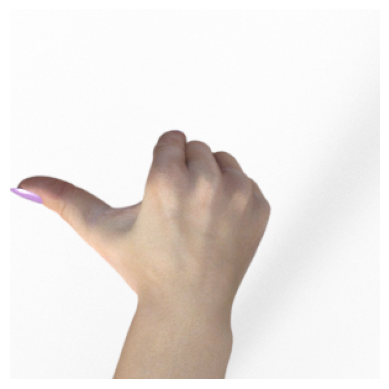

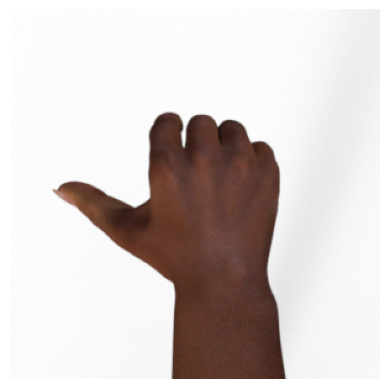

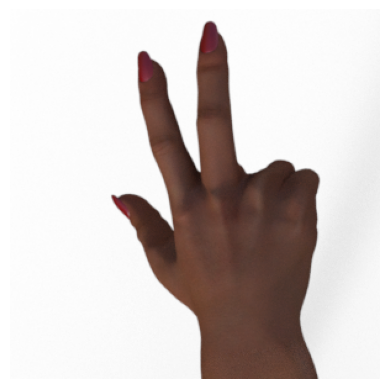

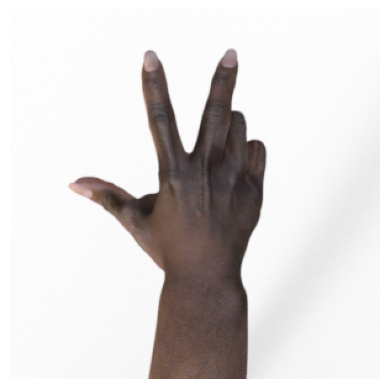

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname)
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname)
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname)
                  for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_scissors):
  # print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


# 5. DATA PREPROCESSING - AUGMENTASI
Sebelum dataset dilatih, dataset perlu diproses terlebih dahulu agar model dapat belajar dengan baik dan tidak overfitting.
Tujuannya adalah sebagai berikut:

*   Menyiapkan dataset agar siap digunakan oleh model CNN.
*   Memperkuat dataset dengan augmentasi sehingga model dapat mengenali pola dari berbagai posisi dan bentuk tangan.
*   Meningkatkan akurasi generalisasi model terhadap data baru.




In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (150,150),
    class_mode = 'categorical',
    batch_size = 126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # this is the first convulotion

    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # The second convulation
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The Third convulation
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fourth convulation
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),

])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,720,259 (6.56 MB)

 Trainable params: 1,720,259 (6.56 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 182s 9s/step - accuracy: 0.3251 - loss: 1.1156 - val_accuracy: 0.3333 - val_loss: 1.0893
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 177s 9s/step - accuracy: 0.3689 - loss: 1.0966 - val_accuracy: 0.5860 - val_loss: 1.0132
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 190s 10s/step - accuracy: 0.4573 - loss: 1.0514 - val_accuracy: 0.6290 - val_loss: 0.7814
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 195s 9s/step - accuracy: 0.4872 - loss: 0.9923 - val_accuracy: 0.6183 - val_loss: 0.6824
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 177s 9s/step - accuracy: 0.5674 - loss: 0.8697 - val_accuracy: 0.7500 - val_loss: 0.4267
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 195s 10s/step - accuracy: 0.6195 - loss: 0.8041 - val_accuracy: 0.5833 - val_loss: 0.8564
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 191s 9s/step - accuracy: 0.6899 - loss: 0.7198 - val_accuracy: 0.4919 - val_loss: 0.9672
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 218s 10s/step - accuracy: 0.6765 - loss: 0.7121 - val_accuracy: 0.9919 

# 6. EVALUASI MODEL
Evaluasi hasil pelatihan dengan menampilkan grafik akurasi (accuracy). Hasil grafik menunjukkan dua garis.
* Garis Merah (Training Accuracy) -> menunjukkan peningkatan accuracy model terhadap data pelatihan.
* Garis Biru (Validation Accuracy) -> menunjukkan performa model terhadap data baru yang belum pernah dilihat model.

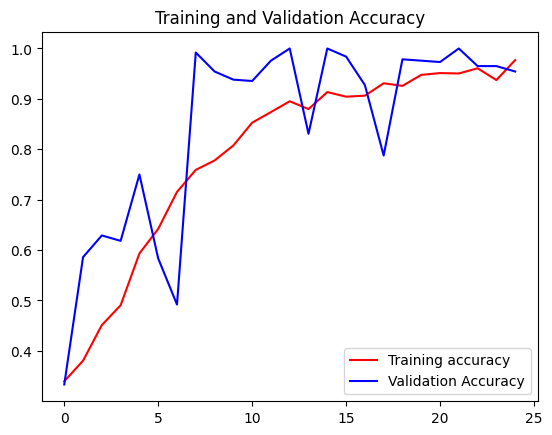

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure

plt.show()

# 7. TESTING MODEL
Tahap ini bertujuan untuk menguji hasil pelatihan model menggunakan gambar baru yang tidak termasuk dalam dataset training atau validation.

Saving coba4.jpg to coba4 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Nama Files:  coba4 (2).jpg
Hasil Prediksi:  [[0. 0. 1.]]


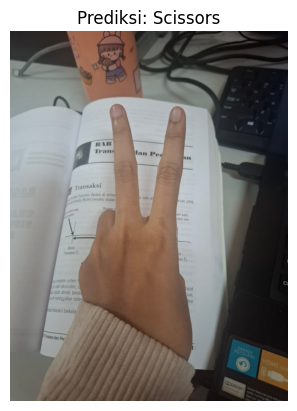

In [48]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

# Upload Gambar
uploaded = files.upload()

# menentukan labels
labels = ['paper', 'rock', 'scissors' ]

for fn in uploaded.keys():

  # predicting_images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  # Cari indeks prediksi tertinggi
  predicted_index = np.argmax(classes)
  predicted_label = labels[predicted_index]

  print("Nama Files: ", fn)
  print("Hasil Prediksi: ", classes)

  # Tampilkan gambar
  plt.imshow(image.load_img(path))
  plt.title(f"Prediksi: {predicted_label.capitalize()}")
  plt.axis('off')
  plt.show()